## Test monthly means with leap year for GNSS-RO data

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import num2date

In [89]:
ds_obs = xr.open_dataset('GPS-RO__CP_LR_5x5_2007-2018.nc')
ds_era5 = xr.open_dataset('FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds_erai = xr.open_dataset('erai.tp.monmean.nc')

In [ ]:
obs_y = ds_obs.resample(time='Y', keep_attrs=True).mean()

era_y = ds_era5.resample(time='Y', keep_attrs=True).mean()
era_y = era_y.sel(lat=slice(-30,30))

In [ ]:
erai_y = ds_erai.resample(time='Y', keep_attrs=True).mean()
erai_y = erai_y.sel(lat=slice(30,-30), time=('1979-12-31', '2018-12-31'))

In [92]:
erai_y

<xarray.Dataset>
Dimensions:       (lat: 86, lon: 512, time: 41)
Coordinates:
  * time          (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2019-12-31
  * lon           (lon) float32 0.0 0.70312524 1.4062505 ... 358.59387 359.297
  * lat           (lat) float32 29.8245 29.122746 ... -29.122746 -29.8245
Data variables:
    tpp           (time, lat, lon) float32 147.4569 147.64584 ... 134.97362
    tpt           (time, lat, lon) float32 207.67558 207.74301 ... 205.2066
    tpz           (time, lat, lon) float32 14.3016815 14.292972 ... 14.932361
    tpp2          (time, lat, lon) float32 101.33665 103.82817 ... 100.65452
    tpt2          (time, lat, lon) float32 205.71117 205.90593 ... 204.7016
    tpz2          (time, lat, lon) float32 16.29523 16.173855 ... 16.429258
    ctpp          (time, lat, lon) float32 97.11722 96.743095 ... 89.821724
    ctpt          (time, lat, lon) float32 203.78424 203.80324 ... 201.6578
    ctpz          (time, lat, lon) float32 16.717766 16.741493 ... 17.203066
    zlrp          (time, lat, lon) float32 96.74949 96.44272 ... 89.63321
    zlrt          (time, lat, lon) float32 203.68117 203.69862 ... 201.53102
    zlrz          (time, lat, lon) float32 16.73015 16.74858 ... 17.200855
    splinezlrp    (time, lat, lon) float32 97.046074 96.68572 ... 89.804825
    splinezlrt    (time, lat, lon) float32 203.66553 203.68524 ... 201.51709
    splinezlrz    (time, lat, lon) float32 16.719057 16.740355 ... 17.197178
    dthetadzminp  (time, lat, lon) float32 491.49884 490.25653 ... 329.40417
    dthetadzmint  (time, lat, lon) float32 257.64017 257.46478 ... 238.94354
    dthetadzminz  (time, lat, lon) float32 6.2523556 6.2695956 ... 9.148704
    cpsmr         (time, lat, lon) float32 34.008934 34.28862 ... 28.111946
    occ2nd        (time, lat, lon) float64 17.65 16.21 16.41 ... 21.19 20.5
    tpp2mtpp      (time, lat, lon) float32 -115.60965 -108.72365 ... -92.66996
    tpt2mtpt      (time, lat, lon) float32 -12.192271 -11.302386 ... -9.760732
    tpz2mtpz      (time, lat, lon) float32 4.690639 4.4190464 ... 3.94713
    zlrsmr        (time, lat, lon) float32 33.564213 33.793392 ... 27.573425

In [82]:
era_y_mean = np.zeros(era_y.time.shape[0])
erai_

for i in range(len(era_y_mean)):
    era_y_mean[i] = era_y.ctpt[i, :, :].mean()

In [83]:
obs_y_mean = np.zeros(obs_y.time.shape[0])

for i in range(len(obs_y_mean)):
    obs_y_mean[i] = obs_y.CP_T[i, :, :].mean()

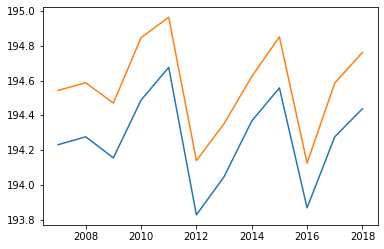

In [87]:
plt.plot(np.linspace(2007,2018,12),era_y_mean)
plt.plot(np.linspace(2007,2018,12),obs_y_mean)

In [85]:
era_y_mean - obs_y_mean

array([-0.31248474, -0.31105042, -0.31549072, -0.35954285, -0.2882843 ,
       -0.31246948, -0.3057251 , -0.2555542 , -0.2936554 , -0.25746155,
       -0.30905151, -0.32402039])

In [45]:
test.CP_T[13,:,:].mean()

<xarray.DataArray 'CP_T' ()>
array(192.23679, dtype=float32)
Coordinates:
    time     datetime64[ns] 2008-02-29

In [44]:
ds.CP_T[396:425, : , :].mean()

<xarray.DataArray 'CP_T' ()>
array(192.23677, dtype=float32)

In [36]:
ds.time[396:425]

<xarray.DataArray 'time' (time: 29)>
array(['2008-02-01T00:00:00.000000000', '2008-02-02T00:00:00.000000000',
       '2008-02-03T00:00:00.000000000', '2008-02-04T00:00:00.000000000',
       '2008-02-05T00:00:00.000000000', '2008-02-06T00:00:00.000000000',
       '2008-02-07T00:00:00.000000000', '2008-02-08T00:00:00.000000000',
       '2008-02-09T00:00:00.000000000', '2008-02-10T00:00:00.000000000',
       '2008-02-11T00:00:00.000000000', '2008-02-12T00:00:00.000000000',
       '2008-02-13T00:00:00.000000000', '2008-02-14T00:00:00.000000000',
       '2008-02-15T00:00:00.000000000', '2008-02-16T00:00:00.000000000',
       '2008-02-17T00:00:00.000000000', '2008-02-18T00:00:00.000000000',
       '2008-02-19T00:00:00.000000000', '2008-02-20T00:00:00.000000000',
       '2008-02-21T00:00:00.000000000', '2008-02-22T00:00:00.000000000',
       '2008-02-23T00:00:00.000000000', '2008-02-24T00:00:00.000000000',
       '2008-02-25T00:00:00.000000000', '2008-02-26T00:00:00.000000000',
       '2008-02-27T00:00:00.000000000', '2008-02-28T00:00:00.000000000',
       '2008-02-29T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-02-01 2008-02-02 ... 2008-02-29
Attributes:
    long_name:  time